# Cartera de Proyectos Mineros en Argentina (Primera Entrega)

**Autor:** Gabriel Riveros Lobos  
**Fecha:** 22/09/2025  

---
[![Repo DS2](https://img.shields.io/badge/GitHub-DS2_PrimeraEntrega-blue)](https://github.com/tu-usuario/DS2-Primera-Entrega-GabrielRiveros)

---

## Descripción del Proyecto

Analizamos la cartera de proyectos mineros metalíferos y de litio del SIACAM para:

- Explorar y limpiar el dataset.  
- Generar variables clave:  
  - Región (macrozonas de provincias)  
  - Etapas    
  - Estado ordinal de avance   
  - Codificación de mineral (One-Hot / LabelEncoder).  
- Visualizar distribuciones univariadas y relaciones bivariadas.  
- Realizar pruebas estadísticas básicas (χ², ANOVA, Tukey HSD).

---
**Fecha de acceso:** 22/09/2025  

---

## Estructura del Notebook

1. [Descubrimiento de Datasets con CKAN API](#descubrimiento-de-datasets-con-ckan-api)  
2. [Descarga y Carga de Datos](#descarga-y-carga-de-datos)  
3. [Exploración Inicial (EDA)](#exploración-inicial-eda)  
4. [Limpieza de Datos e Ingeniería de Variables](#limpieza-de-datos-e-ingeniería-de-variables)  
5. [Visualizaciones Univariadas](#visualizaciones-univariadas)  
6. [Visualizaciones Bivariadas](#visualizaciones-bivariadas)  
7. [Análisis Estadístico (χ², ANOVA, Tukey)](#análisis-estadístico-χ²-anova-tukey)  
8. [Conclusiones y Próximos Pasos](#conclusiones-y-próximos-pasos)


# 1. Descubrimiento de Datasets con CKAN API
CKAN (Comprehensive Knowledge Archive Network) es la plataforma de datos abiertos que utiliza datos.gob.ar. Su API RESTful nos permite descubrir, inspeccionar y descargar datasets de forma reproducible.

- **Base URL de la API**  
  https://datos.gob.ar/api/3/action

- **Endpoints principales**  
  - `package_search`  
    • Busca datasets por palabra clave, filtros y paginación.  
    • Parámetros más usados: `q` (query), `rows` (número de resultados), `start`.  
  - `package_show`  
    • Recupera metadatos completos de un dataset por su `id` o `name`.  
  - `resource_search`  
    • Filtra recursos (archivos) por atributos como `package_id`, `format`, `tags`.  
  - `resource_show`  
    • Obtiene detalles de un recurso específico usando su `id`.

In [192]:
from ckanapi import RemoteCKAN

# Inicializa el cliente CKAN apuntando al endpoint de la API
# La URL para ckanapi debe ser la base del portal,
# ckanapi añadirá automáticamente /api/3/action/
try:
    ckan = RemoteCKAN('https://datos.gob.ar/')

    # Búsqueda de paquetes (datasets)
    # Buscaremos por palabra clave "Minería" y luego filtraremos por título
    # Aumentar rows para asegurar que se encuentre
    search_results = ckan.action.package_search(q='Minería', rows=20)

    print("Total de paquetes encontrados que coinciden con la búsqueda inicial:", search_results["count"])

    mineria_comparada_id = None
    print("\nResultados de la búsqueda inicial:")
    for pkg in search_results["results"]:
        print(f"Dataset: {pkg['title']} (ID: {pkg['id']})") # Print title and ID
        if pkg["title"] == "Minería Comparada (SIACAM)":
            mineria_comparada_id = pkg["id"]
            print(f"  -> Encontrado 'Minería Comparada (SIACAM)' con ID: {mineria_comparada_id}")

    if mineria_comparada_id:
        print(f"\nID del dataset 'Minería Comparada (SIACAM)': {mineria_comparada_id}")
    else:
        print("\nEl dataset 'Minería Comparada (SIACAM)' no se encontró en los resultados de la búsqueda inicial.")


except Exception as e:
    print(f"Ocurrió un error al conectarse o buscar en la API: {e}")

Ocurrió un error al conectarse o buscar en la API: Response ended prematurely


In [193]:
def format_size(size_bytes):
    """Formats size in bytes to a human-readable string (KB, MB, GB)."""
    if size_bytes is None:
        return "N/A"
    try:
        size_bytes = int(size_bytes)
    except (ValueError, TypeError):
        return "Invalid size data"

    if size_bytes < 1024:
        return f"{size_bytes} bytes"
    elif size_bytes < 1024 * 1024:
        return f"{size_bytes / 1024:.2f} KB"
    elif size_bytes < 1024 * 1024 * 1024:
        return f"{size_bytes / (1024 * 1024):.2f} MB"
    else:
        return f"{size_bytes / (1024 * 1024 * 1024):.2f} GB"

def print_resource_details(resource):
    """Prints details for a single resource."""
    print(f"  - Nombre: {resource.get('name', 'N/A')}")
    print(f"    Formato: {resource.get('format', 'N/A')}")
    print(f"    URL: {resource.get('url', 'N/A')}")
    # Get size and format it
    size = resource.get('size')
    print(f"    Tamaño: {format_size(size)}")
    print("-" * 20) # Separador para recursos

# Obtener los detalles de un dataset específico usando su nombre o ID
try:
    # Usaremos el ID del dataset que especificaste: mineria_1
    dataset_id_to_show = "mineria_1"
    print(f"Obteniendo detalles del dataset con ID: {dataset_id_to_show}")
    # Assumes 'ckan' object is initialized in a previous cell
    dataset_details = ckan.action.package_show(id=dataset_id_to_show)

    print("\nDetalles del Dataset:")
    print("Título:", dataset_details.get("title", "N/A"))
    print("Descripción:", dataset_details.get("notes", "N/A"))
    # Algunos datasets pueden no tener una URL de portal específica
    # print("URL del portal:", dataset_details.get("url", "N/A"))


    print("\nRecursos del Dataset:")
    resources = dataset_details.get("resources")
    if resources:
        for resource in resources:
            print_resource_details(resource)
    else:
        print("Este dataset no tiene recursos listados.")

except NameError:
    print("Error: El objeto 'ckan' no está definido. Asegúrate de ejecutar la celda donde se inicializa la conexión CKAN.")
except Exception as e:
    print(f"Ocurrió un error al obtener los detalles del dataset: {e}")

Obteniendo detalles del dataset con ID: mineria_1

Detalles del Dataset:
Título: Cartera de Proyectos Mineros en Argentina del SIACAM
Descripción: Datos correspondientes al tablero de Cartera de Proyectos del Sistema de Información Abierta a la Comunidad sobre la Actividad Minera en Argentina (SIACAM). Elaborado por la Dirección Nacional de Promoción y Economía Minera (Subsecretaría de Desarrollo Minero, Secretaría de Minería, Ministerio de Economía de la Nación).

Recursos del Dataset:
  - Nombre: Proyectos mineros metalíferos y de litio en Argentina
    Formato: XLSX
    URL: https://www.mecon.gob.ar/dataset/Cartera-de-Proyectos-Mineros-Metaliferos-y-Litio-del-SIACAM.xlsx
    Tamaño: N/A
--------------------
  - Nombre: Proyectos mineros no metalíferos y rocas de aplicación
    Formato: XLSX
    URL: https://www.mecon.gob.ar/dataset/Cartera-de-Proyectos-Mineros-No-Metaliferos-y-Roca-de-Aplicacion-del-SIACAM.xlsx
    Tamaño: N/A
--------------------


# 2. Descarga y Carga de Datos

#2.1 Cartera de Proyectos Mineros en Argentina

**Fuente:** SIACAM – Portal datos.gob.ar  
**Dataset:** Proyectos mineros metalíferos y de litio (XLSX)  
**URL directa:** https://www.mecon.gob.ar/dataset/Cartera-de-Proyectos-Mineros-Metaliferos-y-de-Litio-del-SIACAM.xlsx  
**Licencia:** Datos abiertos del Ministerio de Economía de la Nación  
**Fecha de acceso:** 22/09/2025

In [194]:
import pandas as pd
import requests
import io
import urllib3

# Deshabilita las advertencias de SSL inseguras (solo para este workaround)
# No recomendado en producción
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)


# Encontrar la URL del recurso específico por su nombre
resource_name_to_read = "Proyectos mineros metalíferos y de litio en Argentina"
resource_url = None

if "resources" in dataset_details:
    for resource in dataset_details["resources"]:
        if resource.get("name") == resource_name_to_read:
            resource_url = resource.get("url")
            break

if resource_url:
    print(f"URL del recurso '{resource_name_to_read}': {resource_url}")
    try:
        # Usar requests para descargar el archivo con verificación SSL deshabilitada
        # Advertencia: Esto es inseguro y no recomendado en producción
        response = requests.get(resource_url, verify=False)
        response.raise_for_status() # Lanza una excepción para códigos de estado de error HTTP

        # Leer el contenido del archivo en un DataFrame de pandas desde la memoria
        df = pd.read_excel(io.BytesIO(response.content))

        print("\nPrimeras 5 filas del DataFrame:")
        display(df.head())

        print(f"\nDataset cargado exitosamente con {len(df)} filas y {len(df.columns)} columnas.")


    except requests.exceptions.RequestException as e:
        print(f"Ocurrió un error al descargar el archivo: {e}")
    except Exception as e:
        print(f"Ocurrió un error al leer el archivo Excel: {e}")
else:
    print(f"No se encontró el recurso con el nombre '{resource_name_to_read}' en los detalles del dataset.")

URL del recurso 'Proyectos mineros metalíferos y de litio en Argentina': https://www.mecon.gob.ar/dataset/Cartera-de-Proyectos-Mineros-Metaliferos-y-Litio-del-SIACAM.xlsx

Primeras 5 filas del DataFrame:


,N°,NOMBRE,LATITUD,LONGITUD,MINERAL PRINCIPAL,PROVINCIA,ESTADO,CONTROLANTE (1°),PORCENTAJE (1°),ORIGEN (1°),CONTROLANTE (2°),ORIGEN (2°),PORCENTAJE (2°),CONTROLANTE (3°),PORCENTAJE (3°),ORIGEN (3°)
0,1,20 de septiembre,-24.896,-68.136,Hierro,Salta,Exploración inicial,Diego Ruben Omar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Acazoque,-24.291,-66.378,Plomo,Salta,Exploración inicial,Nuñez Ramon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Acoite/Hornillos,-22.305,-65.107,Plomo,Salta,Exploración inicial,Rubiolo Daniel Gerardo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Adamo,-41.162,-68.505,Oro,Río Negro,Prospección,Valcheta Exploraciones,1.0,Argentina,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Aguas Amargas,-24.685,-66.903,Cobre,Salta,Exploración inicial,Lithium S Corp. S.A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Dataset cargado exitosamente con 324 filas y 16 columnas.


#3. Exploración inicial EDA

### Subtask:
Verificar la información general del DataFrame (`df.info()`) para entender los tipos de datos y la presencia de valores no nulos. Obtener estadísticas descriptivas para las columnas numéricas y (si aplica) categóricas (`df.describe(include='all')`). Identificar y cuantificar los valores faltantes por columna (`df.isnull().sum()`). Examinar los valores únicos en columnas categóricas clave para identificar posibles inconsistencias (`df['nombre_columna'].unique()`).


In [195]:
# Crear una copia del DataFrame original para trabajar en la limpieza y modificaciones
df_cleaned = df.copy()
print("Se ha creado un backup del DataFrame original (df_cleaned) para trabajar en la limpieza.")

# 1. Verificar la información general del DataFrame limpiado
print("\nInformación general del DataFrame (df_cleaned):")
df_cleaned.info()

# Dimensiones del DataFrame limpiado
print(f"Filas: {df_cleaned.shape[0]}, Columnas: {df_cleaned.shape[1]}")

# Lista de columnas del DataFrame limpiado
print("Columnas disponibles en df_cleaned:")
print(df_cleaned.columns.tolist())

# 2. Obtener estadísticas descriptivas del DataFrame limpiado
print("\nEstadísticas descriptivas del DataFrame (df_cleaned):")
display(df_cleaned.describe(include='all'))

# 3. Identificar y cuantificar los valores faltantes por columna en el DataFrame limpiado
print("\nValores faltantes por columna en df_cleaned:")

missing = df_cleaned.isnull().sum().to_frame(name='nulos')
missing['%'] = missing['nulos'] / len(df_cleaned) * 100
display(missing.sort_values('%', ascending=False))


# 4. Examinar los valores únicos en columnas categóricas clave en el DataFrame limpiado
print("\nValores únicos en columnas categóricas clave en df_cleaned:")
for col in ['MINERAL PRINCIPAL', 'PROVINCIA', 'ESTADO']:
    if col in df_cleaned.columns:
        print(f"\nValores únicos en '{col}' (df_cleaned):")
        print(df_cleaned[col].unique())
    else:
        print(f"\nLa columna '{col}' no se encuentra en el DataFrame (df_cleaned).")

Se ha creado un backup del DataFrame original (df_cleaned) para trabajar en la limpieza.

Información general del DataFrame (df_cleaned):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   N°                 324 non-null    int64  
 1   NOMBRE             324 non-null    object 
 2   LATITUD            324 non-null    float64
 3   LONGITUD           324 non-null    float64
 4   MINERAL PRINCIPAL  324 non-null    object 
 5   PROVINCIA          324 non-null    object 
 6   ESTADO             324 non-null    object 
 7   CONTROLANTE (1°)   227 non-null    object 
 8   PORCENTAJE (1°)    202 non-null    float64
 9   ORIGEN (1°)        201 non-null    object 
 10  CONTROLANTE (2°)   95 non-null     object 
 11  ORIGEN (2°)        93 non-null     object 
 12  PORCENTAJE (2°)    97 non-null     object 
 13  CONTROLANTE (3°)   94 non-null  

,N°,NOMBRE,LATITUD,LONGITUD,MINERAL PRINCIPAL,PROVINCIA,ESTADO,CONTROLANTE (1°),PORCENTAJE (1°),ORIGEN (1°),CONTROLANTE (2°),ORIGEN (2°),PORCENTAJE (2°),CONTROLANTE (3°),PORCENTAJE (3°),ORIGEN (3°)
count,324.00000,324,324.000000,324.000000,324,324,324,227,202.000000,201,95,93,97,94,91,94
unique,NaN,314,NaN,NaN,14,11,10,148,NaN,16,27,10,15,6,4,3
top,NaN,Incahuasi,NaN,NaN,Cobre,Salta,Exploración inicial,Southern Copper Corp.,NaN,Canadá,-,-,-,-,-,-
freq,NaN,3,NaN,NaN,76,146,130,9,NaN,73,64,64,65,89,86,90
mean,162.50000,NaN,-30.529871,-67.563237,NaN,NaN,NaN,NaN,0.948545,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,93.67497,NaN,8.238745,1.508618,NaN,NaN,NaN,NaN,0.134981,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.00000,NaN,-48.766670,-71.219560,NaN,NaN,NaN,NaN,0.460000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,81.75000,NaN,-40.200500,-68.666348,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,162.50000,NaN,-25.457670,-67.448831,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,243.25000,NaN,-24.425250,-66.346660,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Valores faltantes por columna en df_cleaned:


,nulos,%
PORCENTAJE (3°),233,71.913580
ORIGEN (2°),231,71.296296
ORIGEN (3°),230,70.987654
CONTROLANTE (3°),230,70.987654
CONTROLANTE (2°),229,70.679012
PORCENTAJE (2°),227,70.061728
ORIGEN (1°),123,37.962963
PORCENTAJE (1°),122,37.654321
CONTROLANTE (1°),97,29.938272
ESTADO,0,0.000000



Valores únicos en columnas categóricas clave en df_cleaned:

Valores únicos en 'MINERAL PRINCIPAL' (df_cleaned):
['Hierro' 'Plomo' 'Oro' 'Cobre' 'Litio' 'Uranio' 'Manganeso' 'Plata'
 'Molibdeno' 'Antimonio' 'Wolframio' 'Niquel' 'Zinc' 'Cesio']

Valores únicos en 'PROVINCIA' (df_cleaned):
['Salta' 'Río Negro' 'Jujuy' 'San Juan' 'La Rioja' 'Catamarca' 'Chubut'
 'Santa Cruz' 'Neuquén' 'Mendoza' 'Catamarca - Salta']

Valores únicos en 'ESTADO' (df_cleaned):
['Exploración inicial' 'Prospección' 'Producción' 'Exploración avanzada'
 'Evaluación Económica Preliminar' 'Prefactibilidad' 'Construcción'
 'Reingeniería' 'Factibilidad' 'Cese de operaciones']


#4. Limpieza básica

### Subtask:
Decidir cómo manejar los valores faltantes identificados en el paso anterior (por ejemplo, eliminando filas/columnas, imputando valores). Corregir posibles inconsistencias o errores tipográficos en columnas categóricas si se encontraron durante la exploración. Asegurarse de que las columnas con datos numéricos o de coordenadas tengan el tipo de dato correcto si `df.info()` mostró algo inesperado.


##4.2 Limpieza de valores faltantes

- Se definen como “alto porcentaje de faltantes” aquellas columnas con > 30 % de nulos.
- De acuerdo a la tabla anterior, las columnas:
  - CONTROLANTE (2°), ORIGEN (2°), PORCENTAJE (2°)
  - CONTROLANTE (3°), ORIGEN (3°), PORCENTAJE (3°)
  
  presentan más del 70 % de valores faltantes y se eliminan porque no son críticas para el análisis (nos enfocamos en ubicación, mineral y estado).

- **Nota**: Las columnas de 1° control/origen tienen entre 30 % y 38 % de nulos. Se deciden **mantener** en esta primera entrega para posibles análisis futuros, dejando para más adelante la imputación o descarte según requerimientos de modelado.


In [196]:

columns_to_drop = [
    'CONTROLANTE (2°)', 'ORIGEN (2°)', 'PORCENTAJE (2°)',
    'CONTROLANTE (3°)', 'ORIGEN (3°)', 'PORCENTAJE (3°)'
]
df_cleaned = df_cleaned.drop(columns=columns_to_drop)
print(f"Columnas eliminadas de df_cleaned debido a la alta cantidad de valores faltantes: {columns_to_drop}")

# Verificar los tipos de datos de 'LATITUD' y 'LONGITUD' en df_cleaned
print("\nVerificando tipos de datos para LATITUD y LONGITUD en df_cleaned:")
df_cleaned.info()

# Según df_cleaned.info() del paso anterior, 'LATITUD' y 'LONGITUD' ya son float64,
# que es el tipo de dato adecuado para coordenadas numéricas. No se necesita conversión en este paso.

# Revisar valores únicos en columnas categóricas clave en df_cleaned para detectar inconsistencias
# Basado en los valores únicos mostrados en el paso anterior para
# 'MINERAL PRINCIPAL', 'PROVINCIA' y 'ESTADO', no se observaron inconsistencias obvias
# (como diferentes formas de escribir la misma categoría).
# Por lo tanto, no se necesita limpieza de errores tipográficos para estas columnas específicas en este paso.
print("\nRevisión de valores únicos en 'MINERAL PRINCIPAL', 'PROVINCIA', 'ESTADO' en df_cleaned confirmó que no hay inconsistencias obvias que requieran limpieza en este momento.")

Columnas eliminadas de df_cleaned debido a la alta cantidad de valores faltantes: ['CONTROLANTE (2°)', 'ORIGEN (2°)', 'PORCENTAJE (2°)', 'CONTROLANTE (3°)', 'ORIGEN (3°)', 'PORCENTAJE (3°)']

Verificando tipos de datos para LATITUD y LONGITUD en df_cleaned:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   N°                 324 non-null    int64  
 1   NOMBRE             324 non-null    object 
 2   LATITUD            324 non-null    float64
 3   LONGITUD           324 non-null    float64
 4   MINERAL PRINCIPAL  324 non-null    object 
 5   PROVINCIA          324 non-null    object 
 6   ESTADO             324 non-null    object 
 7   CONTROLANTE (1°)   227 non-null    object 
 8   PORCENTAJE (1°)    202 non-null    float64
 9   ORIGEN (1°)        201 non-null    object 
dtypes: float64(3), int64(1), object(6)
memory usage: 25.4+ K

##4.3 Resumen EDA Inicial

**Desde la perspectiva Estadística:**

*   Dataset cargado con 324 filas y 10 columnas relevantes después de la limpieza inicial.
*   Se identificó un volumen considerable de valores faltantes en columnas relacionadas con el control y origen (1°, 2° y 3°). Se optó por eliminar las columnas con >30% de faltantes (2° y 3°), pero persisten faltantes en las del 1° controlador.
*   La distribución de variables categóricas (Provincia, Mineral Principal, Estado) presenta concentraciones significativas en ciertas categorías (ej. Salta, Cobre, Exploración inicial), lo cual es relevante para análisis segmentados.
*   Las coordenadas geográficas (LATITUD, LONGITUD) tienen tipos de datos numéricos adecuados, listos para análisis espacial.

##4.4 Preparación para visualización

### Subtask:
Seleccionar las columnas más relevantes para la visualización basadas en los hallazgos de la EDA. Considerar si es necesario transformar o agregar datos para ciertos tipos de visualizaciones (por ejemplo, contar proyectos por provincia).


In [197]:
# Seleccionar columnas relevantes para la visualización de df_cleaned, incluyendo 'NOMBRE' para el gráfico interactivo
relevant_columns = ['NOMBRE', 'LATITUD', 'LONGITUD', 'PROVINCIA', 'MINERAL PRINCIPAL', 'ESTADO']
df_relevant = df_cleaned[relevant_columns]
print("Columnas relevantes seleccionadas para visualización.")
display(df_relevant.head())

# 2. Contar proyectos por provincia
projects_by_province = df_relevant['PROVINCIA'].value_counts().reset_index()
projects_by_province.columns = ['PROVINCIA', 'Count']
print("\nProyectos por Provincia:")
display(projects_by_province.head())

# 3. Contar proyectos por tipo de mineral principal
projects_by_mineral = df_relevant['MINERAL PRINCIPAL'].value_counts().reset_index()
projects_by_mineral.columns = ['MINERAL PRINCIPAL', 'Count']
print("\nProyectos por Tipo de Mineral Principal:")
display(projects_by_mineral.head())

# 4. Contar proyectos por estado
projects_by_state = df_relevant['ESTADO'].value_counts().reset_index()
projects_by_state.columns = ['ESTADO', 'Count']
print("\nProyectos por Estado:")
display(projects_by_state.head())

Columnas relevantes seleccionadas para visualización.


,NOMBRE,LATITUD,LONGITUD,PROVINCIA,MINERAL PRINCIPAL,ESTADO
0,20 de septiembre,-24.896,-68.136,Salta,Hierro,Exploración inicial
1,Acazoque,-24.291,-66.378,Salta,Plomo,Exploración inicial
2,Acoite/Hornillos,-22.305,-65.107,Salta,Plomo,Exploración inicial
3,Adamo,-41.162,-68.505,Río Negro,Oro,Prospección
4,Aguas Amargas,-24.685,-66.903,Salta,Cobre,Exploración inicial



Proyectos por Provincia:


,PROVINCIA,Count
0,Salta,146
1,Río Negro,49
2,San Juan,34
3,Catamarca,26
4,Santa Cruz,25



Proyectos por Tipo de Mineral Principal:


,MINERAL PRINCIPAL,Count
0,Cobre,76
1,Litio,67
2,Oro,58
3,Plata,42
4,Plomo,37



Proyectos por Estado:


,ESTADO,Count
0,Exploración inicial,130
1,Exploración avanzada,71
2,Prospección,61
3,Producción,24
4,Evaluación Económica Preliminar,10


#5. Visualizaciones Univariadas

### Subtask:
Crear visualizaciones básicas para entender la distribución de variables clave.


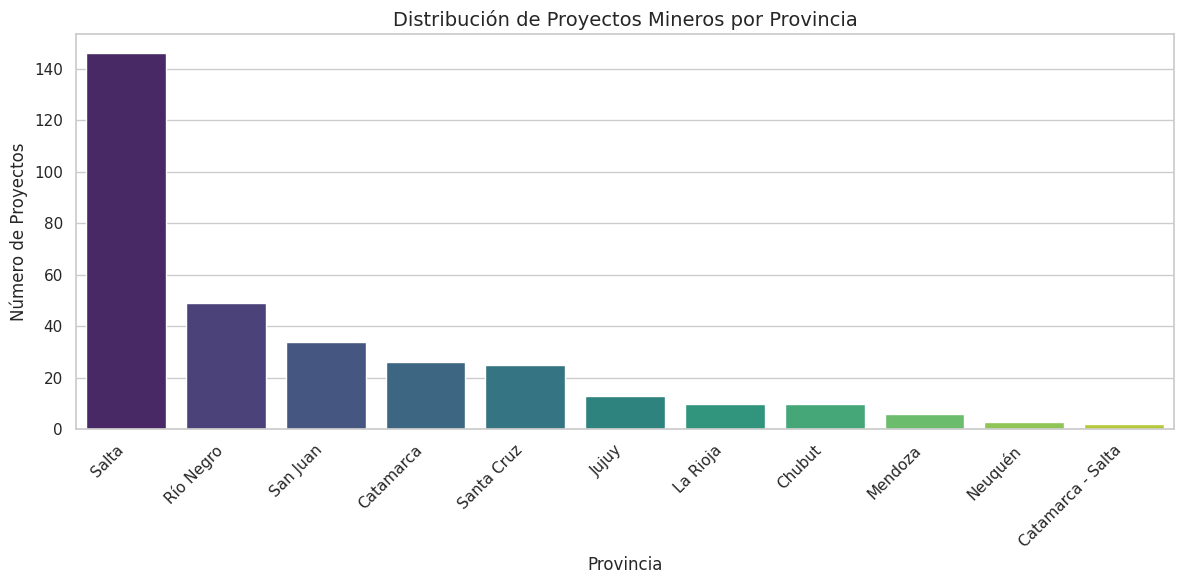

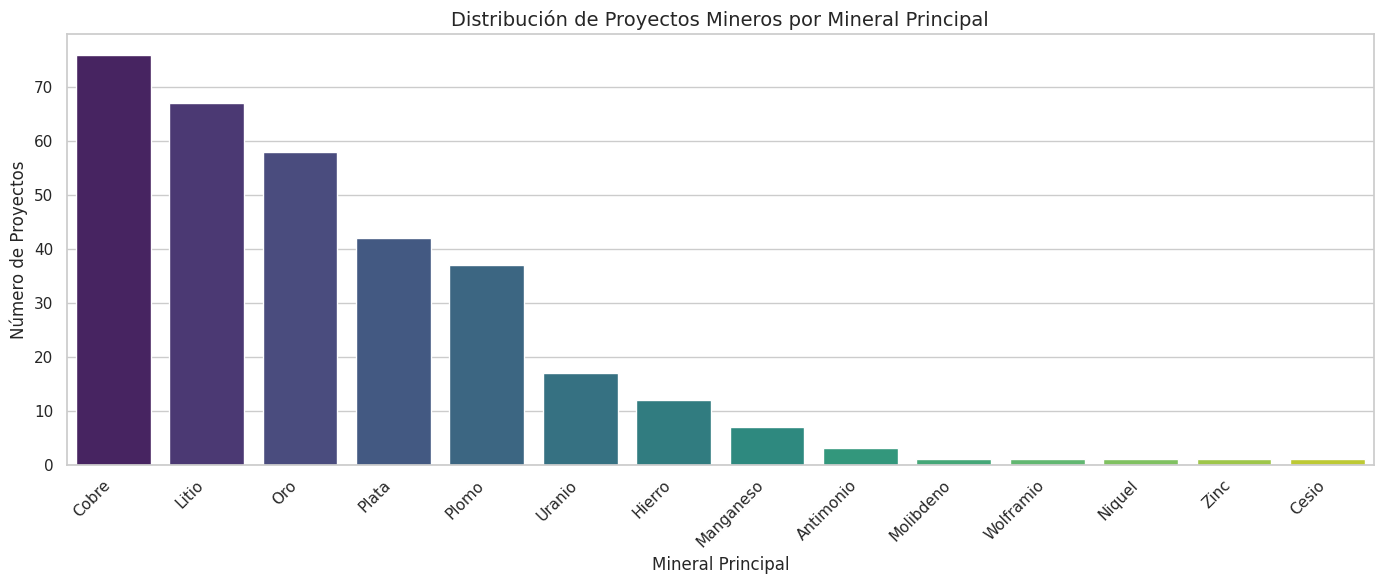

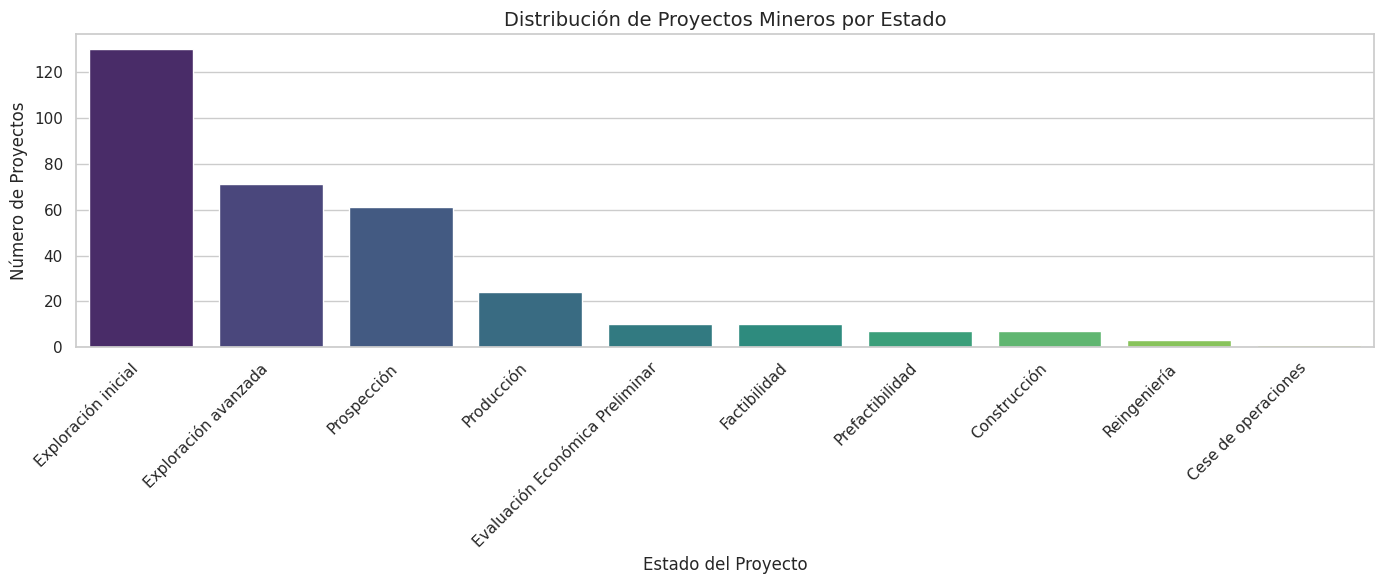

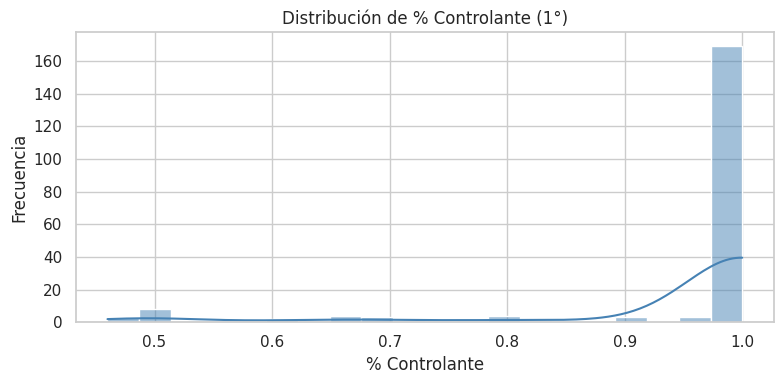

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set plot style for matplotlib/seaborn
sns.set_theme(style="whitegrid")

# 1. Grafico de barras por projecto y provincia
plt.figure(figsize=(12, 6))
sns.barplot(x='PROVINCIA', y='Count', data=projects_by_province.sort_values('Count', ascending=False), palette='viridis', hue='PROVINCIA', legend=False)
plt.title('Distribución de Proyectos Mineros por Provincia', fontsize=14)
plt.xlabel('Provincia', fontsize=12)
plt.ylabel('Número de Proyectos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Grafico de barras por proyecto por mineral
plt.figure(figsize=(14, 6))
sns.barplot(x='MINERAL PRINCIPAL', y='Count', data=projects_by_mineral.sort_values('Count', ascending=False), palette='viridis', hue='MINERAL PRINCIPAL', legend=False)
plt.title('Distribución de Proyectos Mineros por Mineral Principal', fontsize=14)
plt.xlabel('Mineral Principal', fontsize=12)
plt.ylabel('Número de Proyectos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Grafico de barras por proyecto por estado (using seaborn for clarity)
plt.figure(figsize=(14, 6))
sns.barplot(x='ESTADO', y='Count', data=projects_by_state.sort_values('Count', ascending=False), palette='viridis', hue='ESTADO', legend=False)
plt.title('Distribución de Proyectos Mineros por Estado', fontsize=14)
plt.xlabel('Estado del Proyecto', fontsize=12)
plt.ylabel('Número de Proyectos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 4. Graficto tipo Scatter de proyectos por ubicación

fig = px.scatter(df_relevant,
                 x="LONGITUD",
                 y="LATITUD",
                 color="MINERAL PRINCIPAL", # Color points by mineral type
                 hover_name="NOMBRE", # Show project name on hover
                 hover_data=["PROVINCIA", "ESTADO"], # Show province and state on hover
                 title="Ubicación Geográfica Interactiva de Proyectos Mineros por Mineral Principal")

fig.update_layout(
    xaxis_title="Longitud",
    yaxis_title="Latitud",
    title_x=0.5 # Center title
)

fig.show()


# 4. histograma (o density plot) de la variable continua PORCENTAJE (1°)

plt.figure(figsize=(8,4))
sns.histplot(df_cleaned['PORCENTAJE (1°)'].dropna(), bins=20, kde=True, color='steelblue')
plt.title('Distribución de % Controlante (1°)')
plt.xlabel('% Controlante')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


## 5.1 Resumen Visualizaciones Univariadas

### Distribución de Proyectos por Provincia  
Observamos una clara concentración de proyectos en Salta, seguida por San Juan y Jujuy. Esto evidencia el predominio histórico del NOA y Cuyo en la actividad minera argentina.

### Distribución de Proyectos por Mineral  
Los tres minerales con más proyectos son Cobre, Litio y Oro, que juntos suman más de la mitad del total. Esta concentración refleja tanto la demanda global como las estrategias de inversión en metales estratégicos.

### Distribución de Proyectos por Estado  
Más del 80 % de los proyectos está en fases tempranas (Prospección y Exploración), mientras que menos del 20 % ha alcanzado Factibilidad o más. Esto indica un pipeline con alto potencial pero también alto riesgo y necesidad de seguimiento a mediano plazo.

### Ubicación Geográfica de los Proyectos  
El mapa interactivo revela clústeres en regiones mineras clave: NOA (Salta, Jujuy, Catamarca), Cuyo (San Juan, Mendoza) y Patagonia (Santa Cruz, Chubut, Río Negro). Esta distribución espacial apoya el análisis de infraestructura y acceso logístico.

### Distribución de `% Controlante (1°)`  
La mayoría de valores de `% Controlante (1°)` se concentra por debajo del 30 %, con una cola larga hasta valores altos. Esto sugiere variabilidad en la participación del controlador principal y destaca la necesidad de investigar casos atípicos para entender su impacto.


#6. Visualizaciones Bivariadas

### Subtask:
Visualizar relaciones entre el tipo de mineral principal y el estado del proyecto.


<Figure size 1500x800 with 0 Axes>

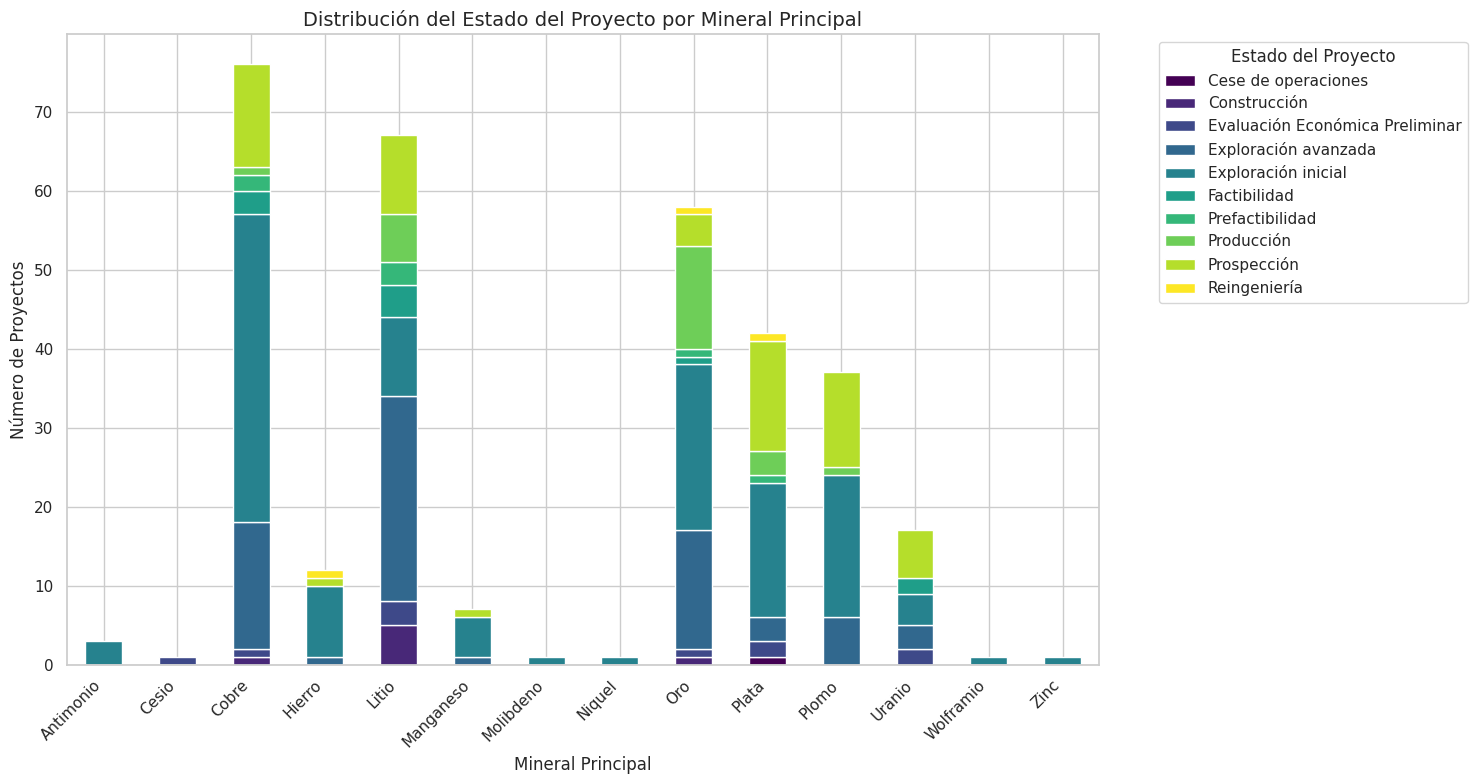

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar datos por 'MINERAL PRINCIPAL' y 'ESTADO' y contar las ocurrencias

mineral_state_counts = df_relevant.groupby(['MINERAL PRINCIPAL', 'ESTADO']).size().unstack(fill_value=0)

# Crear un gráfico de barras apiladas
plt.figure(figsize=(15, 8))
# Usar un mapa de colores adecuado para barras apiladas, y potencialmente ajustar el espaciado para mayor claridad
mineral_state_counts.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='viridis')

plt.title('Distribución del Estado del Proyecto por Mineral Principal', fontsize=14)
plt.xlabel('Mineral Principal', fontsize=12)
plt.ylabel('Número de Proyectos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Estado del Proyecto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [200]:
import plotly.express as px

# Creando un treemap para visualizar la distribución de proyectos por Mineral

fig = px.treemap(df_relevant,
                 path=[px.Constant("Argentina"), 'MINERAL PRINCIPAL', 'ESTADO'], # Definir los niveles de la jerarquía
                 title="Distribución de Proyectos Mineros por Mineral Principal y Estado (Treemap)",
                 color='ESTADO', # Colorear las cajas por el Estado del proyecto
                 hover_data=['PROVINCIA', 'NOMBRE', 'ESTADO'], # Añadir información adicional al pasar el cursor
                 # Usar una paleta de colores discreta más acorde al tema minero
                 color_discrete_sequence=px.colors.sequential.Plasma # Example of a sequential palette
                )


fig.update_layout(
    title_x=0.5,
    # Añadir una anotación de texto para la referencia (ajustar posición según sea necesario)
    annotations=[
        dict(
            text="Fuente: Dirección Nacional de Promoción y Economía Minera (SIACAM), datos.gob.ar",
            showarrow=False,
            xref="paper",
            yref="paper",
            x=0,
            y=-0.05,
            xanchor="left",
            yanchor="top",
            font=dict(size=10)
        )
    ]
)

fig.show()

##6.1 Resumen sobre la Visualización Bivariadas

* Bar Plot (Mineral Principal vs Estado)

  **Observaciones Clave:**

  **Predominio de Etapas Tempranas:** Para la mayoría de los minerales, las secciones apiladas correspondientes a las etapas de "Prospección", "Exploración inicial" y "Exploración avanzada" dominan las barras. Esto refuerza la conclusión general de que la cartera de proyectos mineros en Argentina se encuentra mayoritariamente en fases tempranas de desarrollo.
  **Diferencias en la Madurez por Mineral:** A pesar del predominio de las etapas tempranas, se observan diferencias claras en la distribución de las etapas más avanzadas entre los minerales:
  Minerales como **Oro** y **Litio** muestran segmentos apilados más grandes para las etapas de "Producción", "Construcción" y "Factibilidad" en comparación con otros minerales. Esto sugiere que los proyectos de Oro y Litio en esta cartera, en promedio, han progresado a etapas más maduras que otros.
  Minerales como **Plomo**, **Antimonio**, **Manganeso** y **Uranio** tienden a tener barras compuestas casi exclusivamente por las etapas de "Prospección" y "Exploración", con muy poca o ninguna representación en las etapas avanzadas.
  El **Cobre**, a pesar de tener el mayor número total de proyectos, también muestra una gran proporción en etapas tempranas, aunque con algunos proyectos en etapas intermedias y avanzadas.



* Treemap (Mineral Principal vs Estado)
  **Observaciones Clave:**
  
  **Dominio de Minerales:** La visualización confirma rápidamente cuáles son los minerales con mayor número de proyectos en la cartera, al ser representados por las cajas más grandes en el primer nivel de la jerarquía (ej. Cobre, Litio, Oro).
  **Distribución de Etapas por Mineral:** Dentro de la caja de cada mineral, el tamaño relativo de las sub-cajas de cada estado (`ESTADO`) permite visualizar la proporción de proyectos en cada etapa para ese mineral específico. Esto complementa y refuerza los hallazgos del gráfico de barras apiladas al 100%.
  Por ejemplo, se puede observar visualmente que las secciones correspondientes a estados más avanzados (como "Producción", "Construcción") son proporcionalmente más grandes dentro de las cajas de Oro o Litio, en comparación con minerales como Plomo o Antimonio, donde predominan las cajas de "Prospección" o "Exploración inicial".
  **Exploración Detallada:** La interactividad del treemap permite explorar los niveles de la jerarquía y, al pasar el cursor, obtener información específica de los proyectos individuales (nombre, provincia, etc.).

---
#7. Hipótesis Explícitas


1. *Hipótesis 1:* Ciertas combinaciones de mineral, ubicación y tipo de controlador tienen una mayor tasa de éxito en el avance del proyecto.

2. *Hipótesis 2:* El tipo de mineral, la experiencia/origen del controlador, y la ubicación geográfica son predictores importantes.

3. *Hipótesis 3:* Existen grupos naturales de proyectos que comparten perfiles de riesgo/oportunidad.


---



#8. Generación de nuevas para probar hipótesis.

*   REGION: macrozonas para agrupar provincias.
*   ESTADO_ORD: escala 0–9 según flujo de proyecto.
*   ETAPA_AVANZADA: fases Factibilidad+, target binario.
*   MINERAL_PRINCIPAL_ENCODED: codificación nominal para comparaciones numéricas.

In [201]:
def clasificar_region(provincia):
    if provincia in ['Salta', 'Jujuy', 'Catamarca']:
        return 'NOA'
    elif provincia in ['San Juan', 'La Rioja', 'Mendoza']:
        return 'Cuyo'
    elif provincia in ['Santa Cruz', 'Chubut', 'Río Negro']:
        return 'Patagonia'
    else:
        return 'Otras'

df_cleaned['REGION'] = df_cleaned['PROVINCIA'].apply(clasificar_region)

# Verificar distribución
print(df_cleaned['REGION'].value_counts())


REGION
NOA          185
Patagonia     84
Cuyo          50
Otras          5
Name: count, dtype: int64


In [202]:
#Crear columna numérica para ESTADO

# Mapeo ordinal en el orden real
estado_orden = {
    'Prospección':                       0,
    'Exploración inicial':               1,
    'Exploración avanzada':              2,
    'Evaluación Económica Preliminar':   3,
    'Prefactibilidad':                   4,
    'Factibilidad':                      5,
    'Construcción':                      6,
    'Producción':                        7,
    'Reingeniería':                      8,
    'Cese de operaciones':               9
}

# Aplicar el mapeo
df_cleaned['ESTADO_ORD'] = df_cleaned['ESTADO'].map(estado_orden)

# Verificar que no queden valores nulos (deberían reducirse o eliminarse si todos los estados originales están mapeados)
print("Nulos en ESTADO_ORD:", df_cleaned['ESTADO_ORD'].isnull().sum())
print(df_cleaned['ESTADO_ORD'].value_counts().sort_index())

Nulos en ESTADO_ORD: 0
ESTADO_ORD
0     61
1    130
2     71
3     10
4      7
5     10
6      7
7     24
8      3
9      1
Name: count, dtype: int64


In [203]:
# Definir etapas consideradas como "avanzadas"
etapas_avanzadas = ['Factibilidad', 'Construcción', 'Producción', 'Reingeniería']

# Crear variable binaria
df_cleaned['ETAPA_AVANZADA'] = df_cleaned['ESTADO'].isin(etapas_avanzadas).astype(int)

# Verificar distribución
print(df_cleaned['ETAPA_AVANZADA'].value_counts())


ETAPA_AVANZADA
0    280
1     44
Name: count, dtype: int64


In [204]:
# Codificación ordinal (si hay jerarquía) o nominal (One-Hot)
# Aquí usamos Label Encoding como ejemplo simple

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_cleaned['MINERAL_PRINCIPAL_ENCODED'] = le.fit_transform(df_cleaned['MINERAL PRINCIPAL'])

# Verificar codificación
print(df_cleaned[['MINERAL PRINCIPAL', 'MINERAL_PRINCIPAL_ENCODED']].drop_duplicates().sort_values('MINERAL_PRINCIPAL_ENCODED'))


    MINERAL PRINCIPAL  MINERAL_PRINCIPAL_ENCODED
88          Antimonio                          0
301             Cesio                          1
4               Cobre                          2
0              Hierro                          3
7               Litio                          4
15          Manganeso                          5
71          Molibdeno                          6
162            Niquel                          7
3                 Oro                          8
28              Plata                          9
1               Plomo                         10
14             Uranio                         11
100         Wolframio                         12
184              Zinc                         13


##8.1 Validación de nuevas variables

In [205]:
# Verificar columnas nuevas
print("Columnas nuevas creadas:")
print([col for col in df_cleaned.columns if col in ['ETAPA_AVANZADA', 'REGION', 'MINERAL_PRINCIPAL_ENCODED', 'ESTADO_ORD']])

# Verificar que no hay nulos en las nuevas columnas
print("\nValores nulos en nuevas columnas:")
print(df_cleaned[['ETAPA_AVANZADA', 'REGION', 'MINERAL_PRINCIPAL_ENCODED', 'ESTADO_ORD']].isnull().sum())


Columnas nuevas creadas:
['REGION', 'ESTADO_ORD', 'ETAPA_AVANZADA', 'MINERAL_PRINCIPAL_ENCODED']

Valores nulos en nuevas columnas:
ETAPA_AVANZADA               0
REGION                       0
MINERAL_PRINCIPAL_ENCODED    0
ESTADO_ORD                   0
dtype: int64


##8.2 Análisis de Visualización de relaciones entre:

1.  Región y etapa de avance (REGION vs ETAPA_AVANZADA)
2.  Mineral y etapa (MINERAL PRINCIPAL vs ETAPA_AVANZADA)
3.  Codificación de mineral (MINERAL_PRINCIPAL_ENCODED vs ESTADO_ORD)
4.  Distribución geográfica por región (REGION)

### 8.2.1 Región y etapa de avance (REGION vs ETAPA_AVANZADA)

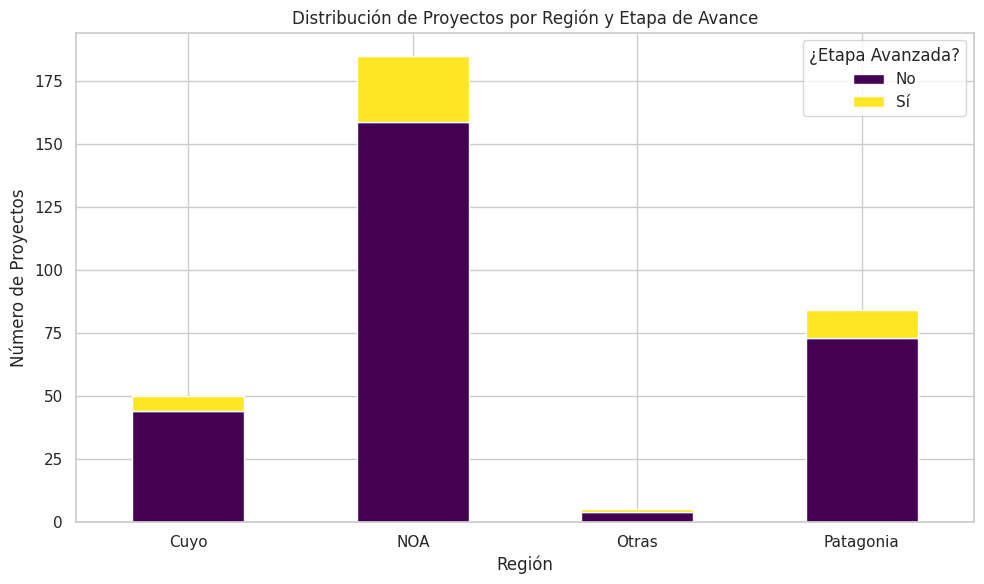

In [206]:
# Agrupar por región y etapa avanzada
region_etapa_counts = df_cleaned.groupby(['REGION', 'ETAPA_AVANZADA']).size().unstack(fill_value=0)

# Gráfico de barras apiladas
region_etapa_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Distribución de Proyectos por Región y Etapa de Avance")
plt.xlabel("Región")
plt.ylabel("Número de Proyectos")
plt.xticks(rotation=0)
plt.legend(title="¿Etapa Avanzada?", labels=["No", "Sí"])
plt.tight_layout()
plt.show()


In [207]:
import pandas as pd

# 1) Crosstab Región × ETAPA_AVANZADA
pivot_re = pd.crosstab(df_cleaned['REGION'], df_cleaned['ETAPA_AVANZADA'])
pivot_re.columns = ['No Avanzada', 'Avanzada']

pivot_re


,No Avanzada,Avanzada
REGION,,
Cuyo,44,6
NOA,159,26
Otras,4,1
Patagonia,73,11


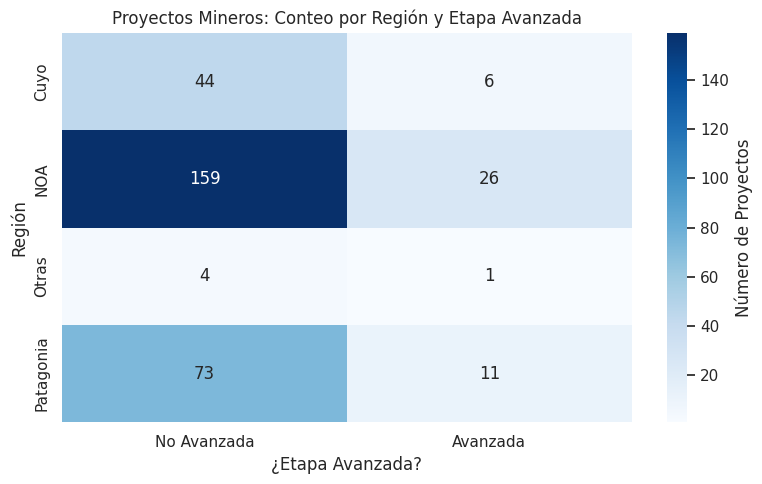

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.heatmap(
    pivot_re,
    annot=True, fmt='d',
    cmap='Blues',
    cbar_kws={'label':'Número de Proyectos'}
)
plt.title("Proyectos Mineros: Conteo por Región y Etapa Avanzada")
plt.xlabel("¿Etapa Avanzada?")
plt.ylabel("Región")
plt.tight_layout()
plt.show()


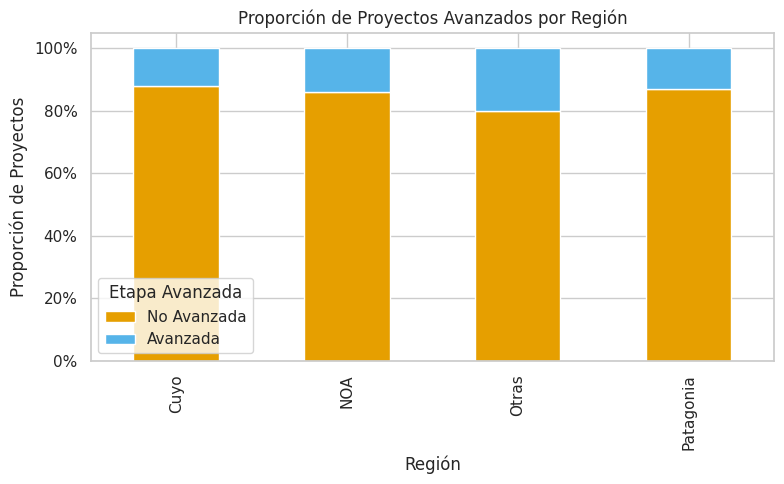

In [209]:
# Convertir a proporciones por región
prop_re = pivot_re.div(pivot_re.sum(axis=1), axis=0)

prop_re.plot(
    kind='bar',
    stacked=True,
    figsize=(8, 5),
    color=['#E69F00','#56B4E9']
)
plt.title("Proporción de Proyectos Avanzados por Región")
plt.xlabel("Región")
plt.ylabel("Proporción de Proyectos")
plt.legend(title="Etapa Avanzada")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.0%}"))
plt.tight_layout()
plt.show()


### 8.2.2 Mineral y etapa (MINERAL PRINCIPAL vs ETAPA_AVANZADA)

In [210]:
import pandas as pd

# Crosstab: Mineral Principal × ETAPA_AVANZADA
pivot_me = pd.crosstab(
    df_cleaned['MINERAL PRINCIPAL'],
    df_cleaned['ETAPA_AVANZADA']
)
pivot_me.columns = ['No Avanzada', 'Avanzada']

pivot_me


,No Avanzada,Avanzada
MINERAL PRINCIPAL,,
Antimonio,3,0
Cesio,1,0
Cobre,71,5
Hierro,11,1
Litio,52,15
Manganeso,7,0
Molibdeno,1,0
Niquel,1,0
Oro,42,16


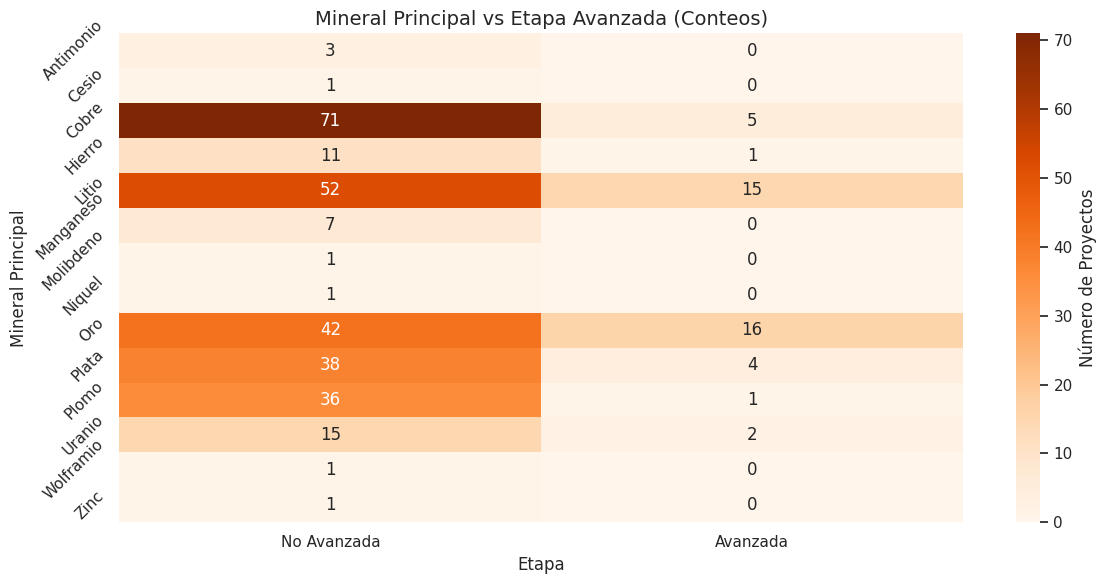

In [211]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot_me,
    annot=True, fmt='d',
    cmap='Oranges',
    cbar_kws={'label': 'Número de Proyectos'}
)
plt.title("Mineral Principal vs Etapa Avanzada (Conteos)", fontsize=14)
plt.xlabel("Etapa")
plt.ylabel("Mineral Principal")
plt.xticks(rotation=0)
plt.yticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


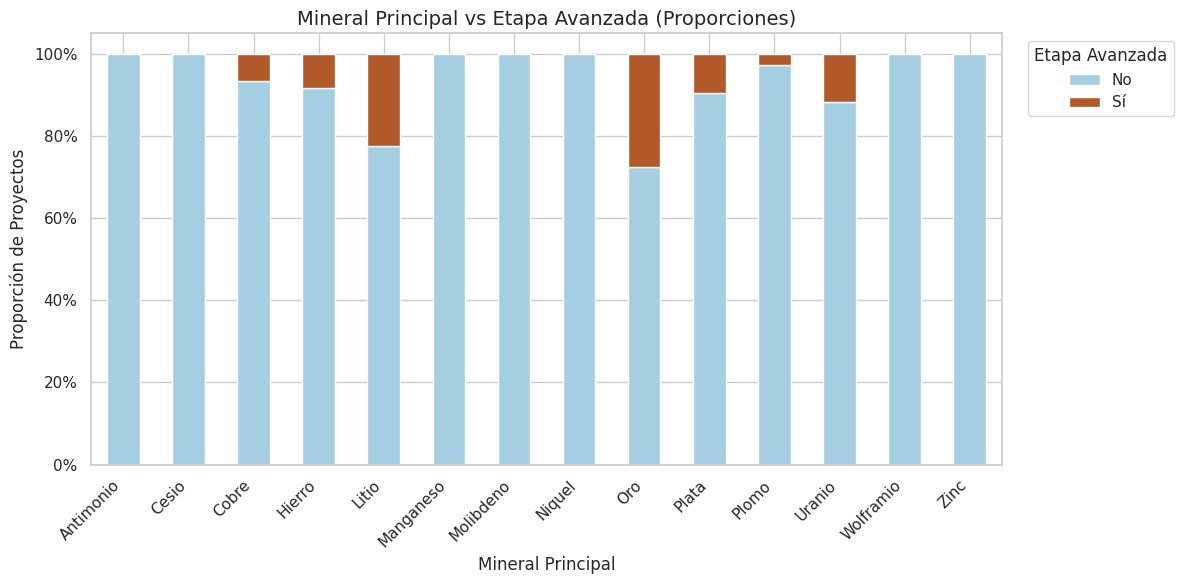

In [212]:
# Proporciones por mineral
prop_me = pivot_me.div(pivot_me.sum(axis=1), axis=0)

prop_me.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='Paired'
)

plt.title("Mineral Principal vs Etapa Avanzada (Proporciones)", fontsize=14)
plt.xlabel("Mineral Principal")
plt.ylabel("Proporción de Proyectos")
plt.legend(title="Etapa Avanzada", labels=['No', 'Sí'], bbox_to_anchor=(1.02, 1))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f"{y:.0%}"))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### 8.3.3 Mineral Codificado vs Estado

#### Para aprovechar MINERAL_PRINCIPAL_ENCODED en análisis y visualizaciones útiles, vamos a:

*  Mapear ESTADO a un valor numérico ordinal (Exploración inicial=0… Producción=9).
*  Calcular la media de esa escala ordinal para cada mineral codificado.
*  Visualizar el promedio de etapa por código, pero etiquetando perfectamente con el nombre del mineral
*  Corroborar con una matriz de correlación de Spearman (monótona) entre código de mineral y etapa.


In [213]:
# Crear columna numérica para ESTADO

# Mapeo ordinal en el orden real
estado_orden = {
    'Prospección':                       0,
    'Exploración inicial':               1,
    'Exploración avanzada':              2,
    'Evaluación Económica Preliminar':   3,  # Added missing state
    'Prefactibilidad':                   4,  # Adjusted ordinal value
    'Factibilidad':                      5,  # Adjusted ordinal value
    'Construcción':                      6,  # Adjusted ordinal value
    'Producción':                        7,  # Adjusted ordinal value
    'Reingeniería':                      8,  # Added missing state and ordinal value
    'Cese de operaciones':               9   # Added missing state and ordinal value
}

# Aplicar el mapeo
df_cleaned['ESTADO_ORD'] = df_cleaned['ESTADO'].map(estado_orden)

# Verificar que no queden valores nulos (deberían reducirse o eliminarse si todos los estados originales están mapeados)
print("Nulos en ESTADO_ORD:", df_cleaned['ESTADO_ORD'].isnull().sum())
print(df_cleaned['ESTADO_ORD'].value_counts().sort_index())

Nulos en ESTADO_ORD: 0
ESTADO_ORD
0     61
1    130
2     71
3     10
4      7
5     10
6      7
7     24
8      3
9      1
Name: count, dtype: int64


In [214]:
#Promedio de etapa por mineral codificado

# 1) Media de etapa por código
mean_state_by_code = (
    df_cleaned
      .groupby('MINERAL_PRINCIPAL_ENCODED')['ESTADO_ORD']
      .mean()
      .sort_values()
)

# 2) Traducir índices numéricos a nombres de mineral
minerals = list(le.inverse_transform(mean_state_by_code.index))
mean_state_by_code.index = minerals

# 3) Mostrar la serie
print(mean_state_by_code)



Antimonio    1.000000
Niquel       1.000000
Molibdeno    1.000000
Manganeso    1.000000
Wolframio    1.000000
Zinc         1.000000
Plomo        1.000000
Cobre        1.447368
Uranio       1.529412
Hierro       1.583333
Plata        1.690476
Litio        2.611940
Oro          2.896552
Cesio        3.000000
Name: ESTADO_ORD, dtype: float64


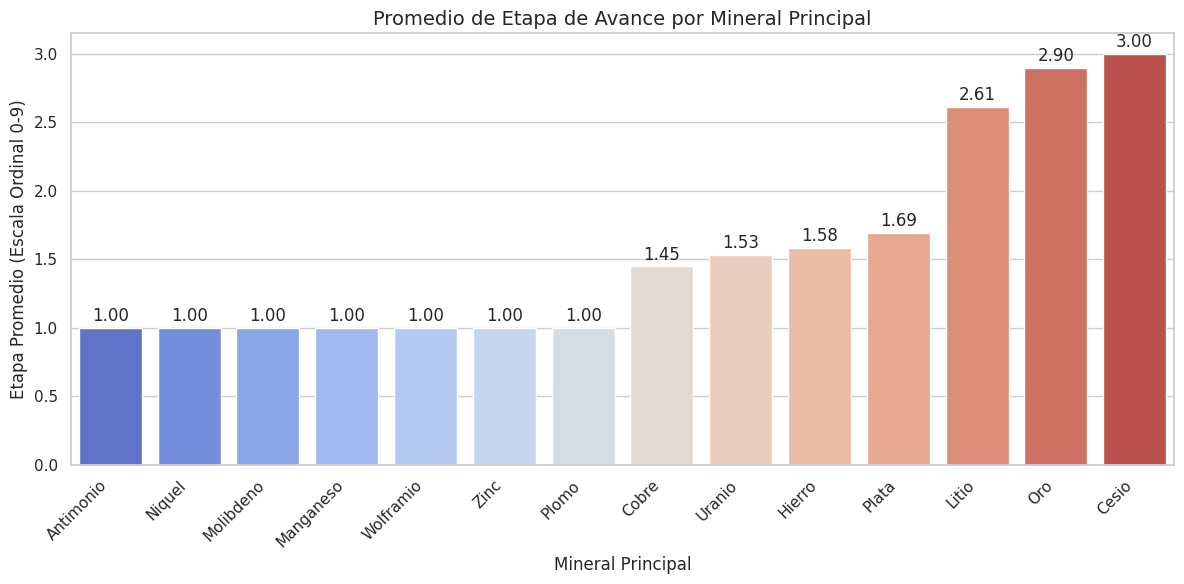

In [215]:
# 3) Gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=mean_state_by_code.index,
    y=mean_state_by_code.values,
    palette='coolwarm',
    hue=mean_state_by_code.index, # Assign x to hue
    legend=False # Set legend to False
)
plt.title("Promedio de Etapa de Avance por Mineral Principal", fontsize=14)
plt.xlabel("Mineral Principal", fontsize=12)
# Corrected y-axis label to reflect the 0-9 ordinal scale
plt.ylabel("Etapa Promedio (Escala Ordinal 0-9)", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Etiquetas
for i, v in enumerate(mean_state_by_code.values):
    ax.text(i, v + 0.05, f"{v:.2f}", ha='center')

plt.tight_layout()
plt.show()

                           MINERAL_PRINCIPAL_ENCODED  ESTADO_ORD
MINERAL_PRINCIPAL_ENCODED                    1.00000    -0.08799
ESTADO_ORD                                  -0.08799     1.00000


/tmp/ipython-input-2375903092.py:19: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.



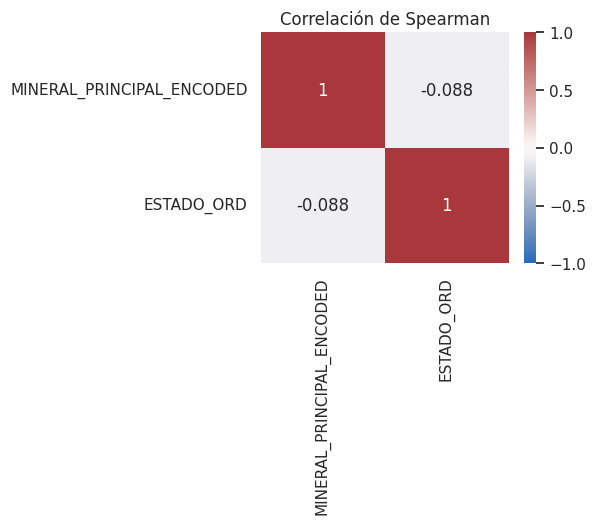

In [216]:
#Correlación de Spearman

# Matriz de correlación
corr_spearman = df_cleaned[
    ['MINERAL_PRINCIPAL_ENCODED', 'ESTADO_ORD']
].corr(method='spearman')
print(corr_spearman)

#Visualización de correlación spearman
plt.figure(figsize=(4, 3))
sns.heatmap(
    corr_spearman,
    annot=True,
    cmap='vlag',
    vmin=-1, vmax=1,
    center=0
)
plt.title("Correlación de Spearman", fontsize=12)
plt.tight_layout()
plt.show()



El coeficiente de Spearman resultó ρ ≈ 0.093, muy cercano a cero. Esto implica que los códigos numéricos asignados a los minerales no reflejan un orden real en la evolución de proyectos.

La codificación ordinal de minerales no captura ningún patrón monotónico con la etapa de avance. Los códigos son arbitrarios y no sirven de predictor ni resumen de la madurez de proyectos.

#9. Profundizando Analisis de Variables Generadas
### One-Hot Encoding + χ² de independencia

### chi2_contingency(pivot_ms) para obtener el p-value y confirmar asociación estadística.

### Visualizaciones categóricas enriquecidas

* 100 % stacked bar chart (estado por mineral) con etiquetas de porcentaje.

* Heatmap de residuos estandarizados para identificar celdas clave (> |2|).

### ANOVA unidireccional sobre ESTADO_ORD

* Test ANOVA para contrastar medias ordinales entre minerales.

* Si es significativo, post-hoc de Tukey para pares de minerales con diferencias reales.

In [217]:
import pandas as pd
from scipy.stats import chi2_contingency

# Generar el pivot table (tabla de contingencia)
# Usamos df_cleaned que contiene los datos limpios y la columna ESTADO completa
pivot_ms = pd.crosstab(df_cleaned['MINERAL PRINCIPAL'], df_cleaned['ESTADO'])

print("Tabla de Contingencia (Mineral Principal vs Estado del Proyecto):")
display(pivot_ms)

# Correr el test Chi-cuadrado de independencia
# chi2_contingency devuelve: chi2 stat, p-value, dof, expected frequencies
chi2, p, dof, ex = chi2_contingency(pivot_ms)

print(f"\nResultado del Test Chi-cuadrado de Independencia:")
print(f"Estadístico Chi-cuadrado: {chi2:.2f}")
print(f"Valor p (p-value): {p:.4f}")
print(f"Grados de libertad (dof): {dof}")

# Interpretar el p-value
alpha = 0.05
print(f"\nInterpretación (usando alpha = {alpha}):")
if p < alpha:
    print(f"El valor p ({p:.4f}) es menor que alpha. Rechazamos la hipótesis nula.")
    print("Conclusión: Existe una asociación estadísticamente significativa entre el Mineral Principal y el Estado del Proyecto.")
else:
    print(f"El valor p ({p:.4f}) es mayor o igual que alpha. No rechazamos la hipótesis nula.")
    print("Conclusión: No hay evidencia suficiente para afirmar una asociación estadísticamente significativa entre el Mineral Principal y el Estado del Proyecto.")

Tabla de Contingencia (Mineral Principal vs Estado del Proyecto):


ESTADO,Cese de operaciones,Construcción,Evaluación Económica Preliminar,Exploración avanzada,Exploración inicial,Factibilidad,Prefactibilidad,Producción,Prospección,Reingeniería
MINERAL PRINCIPAL,,,,,,,,,,
Antimonio,0,0,0,0,3,0,0,0,0,0
Cesio,0,0,1,0,0,0,0,0,0,0
Cobre,0,1,1,16,39,3,2,1,13,0
Hierro,0,0,0,1,9,0,0,0,1,1
Litio,0,5,3,26,10,4,3,6,10,0
Manganeso,0,0,0,1,5,0,0,0,1,0
Molibdeno,0,0,0,0,1,0,0,0,0,0
Niquel,0,0,0,0,1,0,0,0,0,0
Oro,0,1,1,15,21,1,1,13,4,1



Resultado del Test Chi-cuadrado de Independencia:
Estadístico Chi-cuadrado: 168.74
Valor p (p-value): 0.0012
Grados de libertad (dof): 117

Interpretación (usando alpha = 0.05):
El valor p (0.0012) es menor que alpha. Rechazamos la hipótesis nula.
Conclusión: Existe una asociación estadísticamente significativa entre el Mineral Principal y el Estado del Proyecto.


<Figure size 1500x800 with 0 Axes>

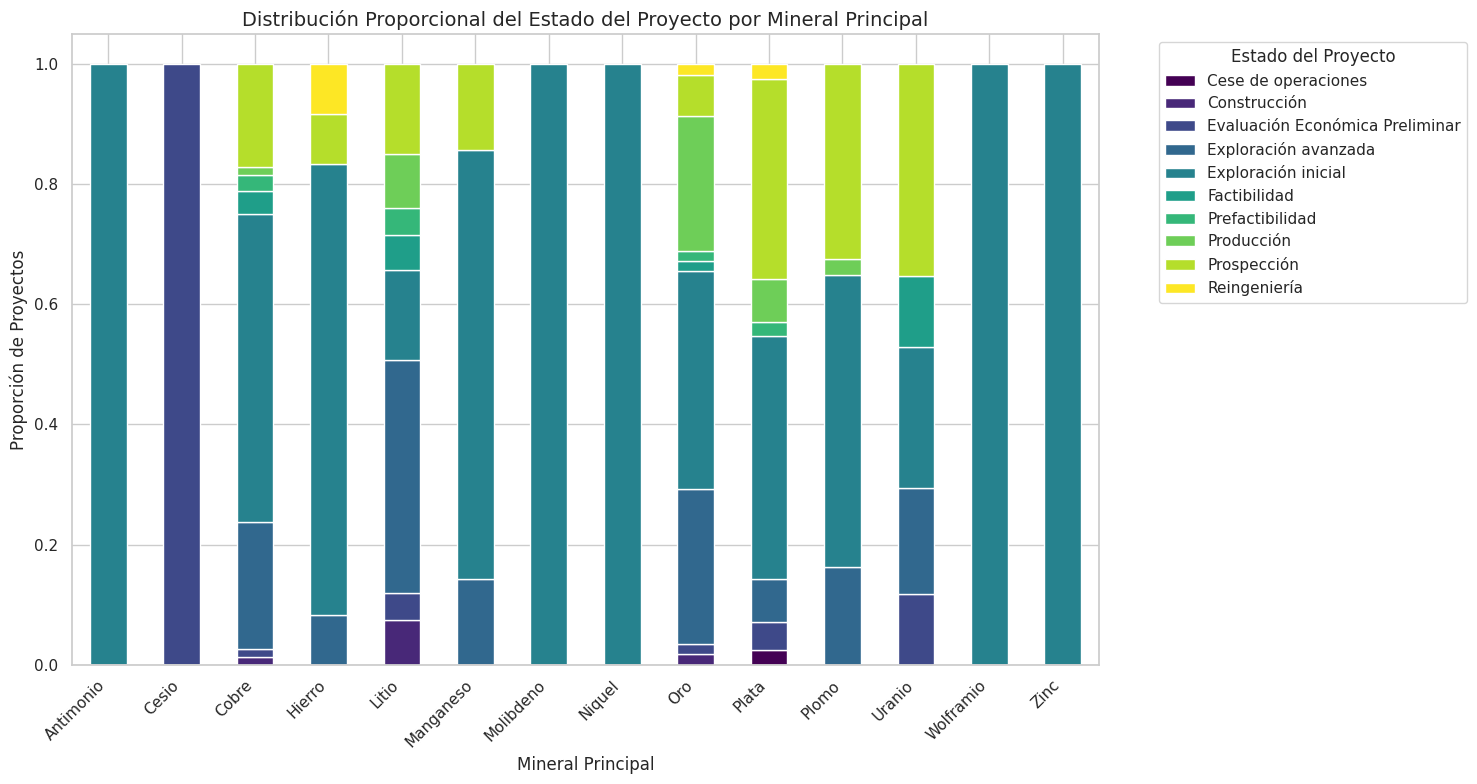

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a crosstab for the 100% stacked bar chart (Mineral Principal vs Estado)
# Using df_cleaned which contains the cleaned data
crosstab_ms = pd.crosstab(df_cleaned['MINERAL PRINCIPAL'], df_cleaned['ESTADO'])

# Calculate proportions
crosstab_ms_prop = crosstab_ms.div(crosstab_ms.sum(1), axis=0)

# Plot the 100% stacked bar chart
plt.figure(figsize=(15, 8))
crosstab_ms_prop.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='viridis')

plt.title('Distribución Proporcional del Estado del Proyecto por Mineral Principal', fontsize=14)
plt.xlabel('Mineral Principal', fontsize=12)
plt.ylabel('Proporción de Proyectos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Estado del Proyecto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

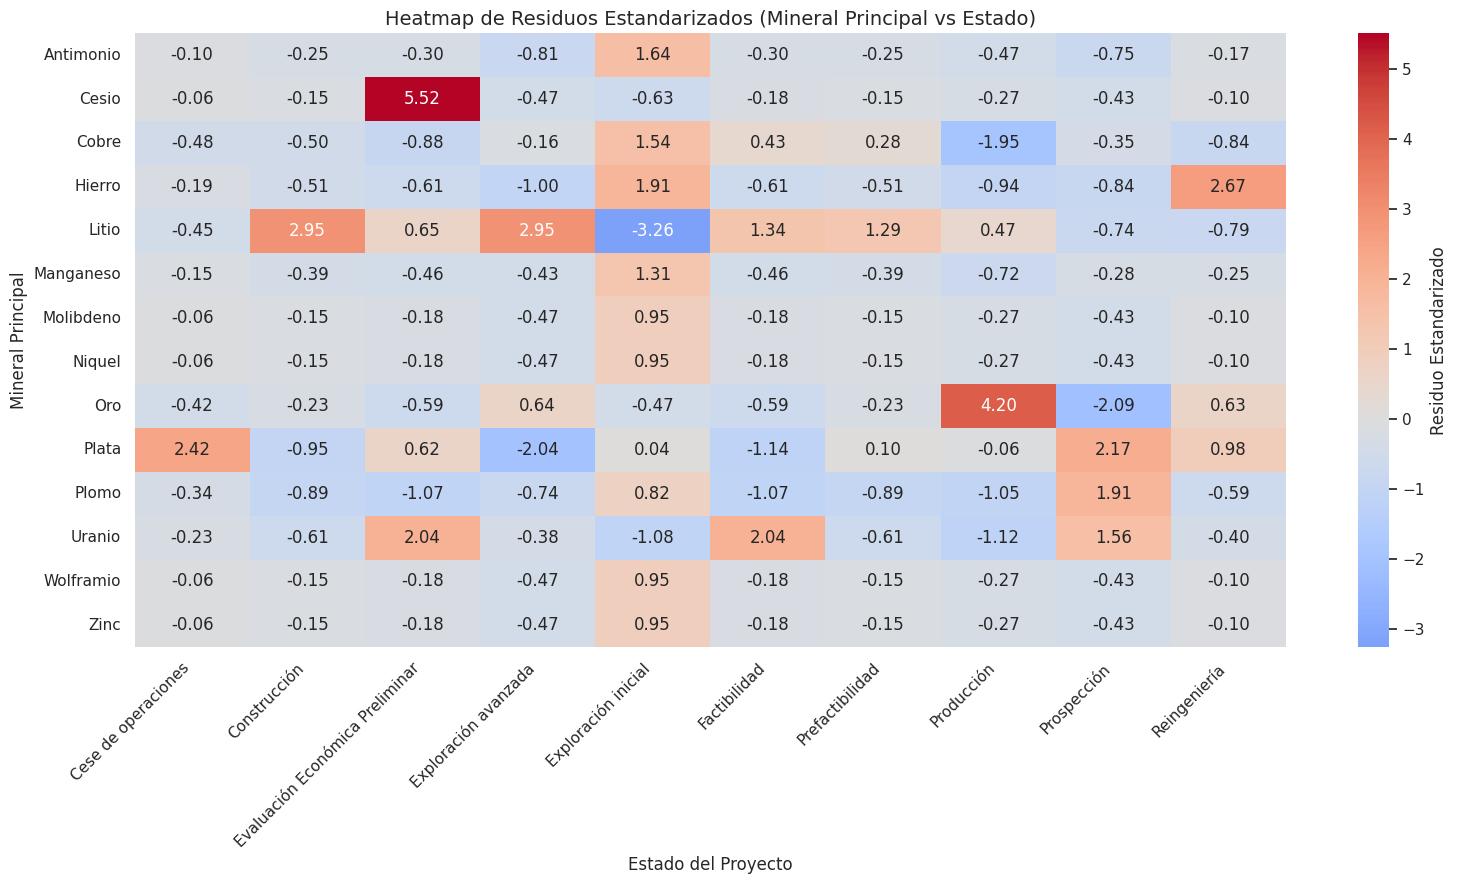

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np # Import numpy

# Ensure the crosstab is available (assuming it was created in a previous cell)
# If not, uncomment the line below:
# pivot_ms = pd.crosstab(df_cleaned['MINERAL PRINCIPAL'], df_cleaned['ESTADO'])

# Calculate expected frequencies and standardized residuals
# chi2_contingency returns: chi2 stat, p-value, dof, expected frequencies
chi2, p, dof, expected = chi2_contingency(pivot_ms)

# Calculate standardized residuals
# Standardized Residual = (Observed - Expected) / sqrt(Expected * (1 - Row Proportion) * (1 - Column Proportion))
# A simpler approximation often used and also informative is (Observed - Expected) / sqrt(Expected)
# Or (Observed - Expected) / sqrt(Expected * (1 - Row Marginal Prob) * (1 - Col Marginal Prob)) - this is adjusted residual
# Let's use (Observed - Expected) / sqrt(Expected) for simplicity and common interpretation in heatmaps
standardized_residuals = (pivot_ms - expected) / np.sqrt(expected)

# Plot the heatmap of standardized residuals
plt.figure(figsize=(16, 9))
sns.heatmap(standardized_residuals, annot=True, fmt=".2f", cmap="coolwarm", center=0,
            cbar_kws={'label': 'Residuo Estandarizado'})
plt.title('Heatmap de Residuos Estandarizados (Mineral Principal vs Estado)', fontsize=14)
plt.xlabel('Estado del Proyecto', fontsize=12)
plt.ylabel('Mineral Principal', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [220]:
import scipy.stats as stats
import pandas as pd

# Prepare data for ANOVA: separate ESTADO_ORD values into groups by MINERAL PRINCIPAL
# We need a list of arrays/lists, where each array/list contains the ESTADO_ORD values
# for a specific mineral type.

# Get the unique mineral types
mineral_types = df_cleaned['MINERAL PRINCIPAL'].unique()

# Create a list to hold the ESTADO_ORD values for each mineral group
mineral_groups = []

# Iterate through each mineral type and extract the ESTADO_ORD values
for mineral in mineral_types:
    # Filter df_cleaned for the current mineral type and get the ESTADO_ORD column
    estado_ord_values = df_cleaned[df_cleaned['MINERAL PRINCIPAL'] == mineral]['ESTADO_ORD'].dropna() # Drop potential NaNs just in case

    # Add the array of values to the list
    # Check if the group is not empty before adding
    if not estado_ord_values.empty:
        mineral_groups.append(estado_ord_values)

# Perform one-way ANOVA test
# f_oneway takes multiple arrays as input, one for each group
f_statistic, p_value = stats.f_oneway(*mineral_groups)

print("--- Resultado del Test ANOVA Unidireccional ---")
print(f"Estadístico F: {f_statistic:.4f}")
print(f"Valor p (p-value): {p_value:.4f}")

# Interpret the p-value
alpha = 0.05
print(f"\nInterpretación (usando alpha = {alpha}):")
if p_value < alpha:
    print(f"El valor p ({p_value:.4f}) es menor que alpha. Rechazamos la hipótesis nula.")
    print("Conclusión: Existe una diferencia estadísticamente significativa en las medias de la etapa ordinal entre al menos un par de grupos de Mineral Principal.")
    print("Esto sugiere que el tipo de mineral principal sí influye en la etapa promedio de avance del proyecto.")
else:
    print(f"El valor p ({p_value:.4f}) es mayor o igual que alpha. No rechazamos la hipótesis nula.")
    print("Conclusión: No hay evidencia suficiente para afirmar una diferencia estadísticamente significativa en las medias de la etapa ordinal entre los grupos de Mineral Principal.")

--- Resultado del Test ANOVA Unidireccional ---
Estadístico F: 3.0414
Valor p (p-value): 0.0003

Interpretación (usando alpha = 0.05):
El valor p (0.0003) es menor que alpha. Rechazamos la hipótesis nula.
Conclusión: Existe una diferencia estadísticamente significativa en las medias de la etapa ordinal entre al menos un par de grupos de Mineral Principal.
Esto sugiere que el tipo de mineral principal sí influye en la etapa promedio de avance del proyecto.


In [221]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

# Realizar el test post-hoc de Tukey HSD
# Los inputs son: data (los valores numéricos), groups (las etiquetas de grupo)
tukey_result = pairwise_tukeyhsd(
    endog=df_cleaned['ESTADO_ORD'], # Nuestra variable numérica ordinal
    groups=df_cleaned['MINERAL PRINCIPAL'], # Nuestra variable categórica de grupo
    alpha=0.05 # Nivel de significancia
)

print("--- Resultado del Test Post-hoc de Tukey HSD ---")
print(tukey_result)

# Interpretación de los resultados:
# La tabla muestra comparaciones por pares de grupos (minerales).
# 'meandiff': La diferencia en las medias de las etapas ordinales entre los dos grupos.
# 'lower'/'upper': El intervalo de confianza del 95% para la diferencia de medias.
# 'reject': TRUE si la diferencia es estadísticamente significativa (p-value < alpha), FALSE en caso contrario.
print("\nInterpretación:")
print("- Busca la columna 'reject'.")
print("- Si dice TRUE, hay una diferencia estadísticamente significativa en la etapa promedio entre ese par de minerales.")
print("- Si dice FALSE, no hay evidencia suficiente para decir que sus etapas promedio son diferentes (al nivel de significancia del 5%).")

--- Resultado del Test Post-hoc de Tukey HSD ---
    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower    upper  reject
-----------------------------------------------------------
Antimonio     Cesio      2.0 0.9998  -5.7256  9.7256  False
Antimonio     Cobre   0.4474    1.0  -3.4909  4.3857  False
Antimonio    Hierro   0.5833    1.0  -3.7354  4.9021  False
Antimonio     Litio   1.6119 0.9836  -2.3364  5.5603  False
Antimonio Manganeso      0.0    1.0  -4.6169  4.6169  False
Antimonio Molibdeno      0.0    1.0  -7.7256  7.7256  False
Antimonio    Niquel      0.0    1.0  -7.7256  7.7256  False
Antimonio       Oro   1.8966 0.9402  -2.0649   5.858  False
Antimonio     Plata   0.6905    1.0  -3.3079  4.6889  False
Antimonio     Plomo      0.0    1.0  -4.0164  4.0164  False
Antimonio    Uranio   0.5294    1.0  -3.6604  4.7192  False
Antimonio Wolframio      0.0    1.0  -7.7256  7.7256  False
Antimonio      Zinc      0.0    1.0  -7.7256  7.725

##9.1 **Resumen Mineral Principal vs Estado:**

Existe una Asociación Significativa (Chi-cuadrado): El resultado del test Chi-cuadrado (4f3898a7)

*Se confirma formalmente que la distribución de los proyectos a través de las diferentes etapas de avance no es independiente del tipo de mineral principal*. _Hay una relación estadísticamente significativa entre estas dos variables._

### Las Medias de Etapa Difieren entre Minerales (ANOVA):
El test ANOVA (73a99dee) complementa lo anterior al mostrar que las medias de la etapa ordinal (ESTADO_ORD) son significativamente diferentes para al menos algunos de los grupos de minerales. Esto refuerza la idea de que el tipo de mineral está relacionado con la etapa promedio de avance.

## Identificación de Diferencias Específicas (Tukey):
El test post-hoc de Tukey (1f4c8ba7) nos da detalles cruciales sobre qué pares de minerales tienen diferencias significativas en sus etapas promedio. Al revisar la tabla de resultados de Tukey, podemos identificar, por ejemplo, que:

*   Hay una diferencia significativa en la etapa promedio entre Litio y Cobre (reject=True), siendo el Litio, en promedio, proyectos en etapas más avanzadas que el Cobre.

*   Hay una diferencia significativa entre Oro y Cobre (reject=True), con el Oro, en promedio, en etapas más avanzadas que el Cobre.

*   Hay una diferencia significativa entre Litio y Plomo (reject=True), con el Litio, en promedio, en etapas más avanzadas que el Plomo.

*   Hay una diferencia significativa entre Oro y Plomo (reject=True), con el Oro, en promedio, en etapas más avanzadas que el PlomoElemento de lista

(Nota: Otras comparaciones pueden no ser significativas al nivel de confianza del 95%).**

#10. Distribución geográfica por región

In [222]:
fig = px.scatter(
    df_cleaned,
    x="LONGITUD",
    y="LATITUD",
    color="REGION",
    hover_name="NOMBRE",
    hover_data=["MINERAL PRINCIPAL", "ESTADO"],
    title="Ubicación Geográfica de Proyectos Mineros por Región"
)
fig.update_layout(xaxis_title="Longitud", yaxis_title="Latitud", title_x=0.5)
fig.show()


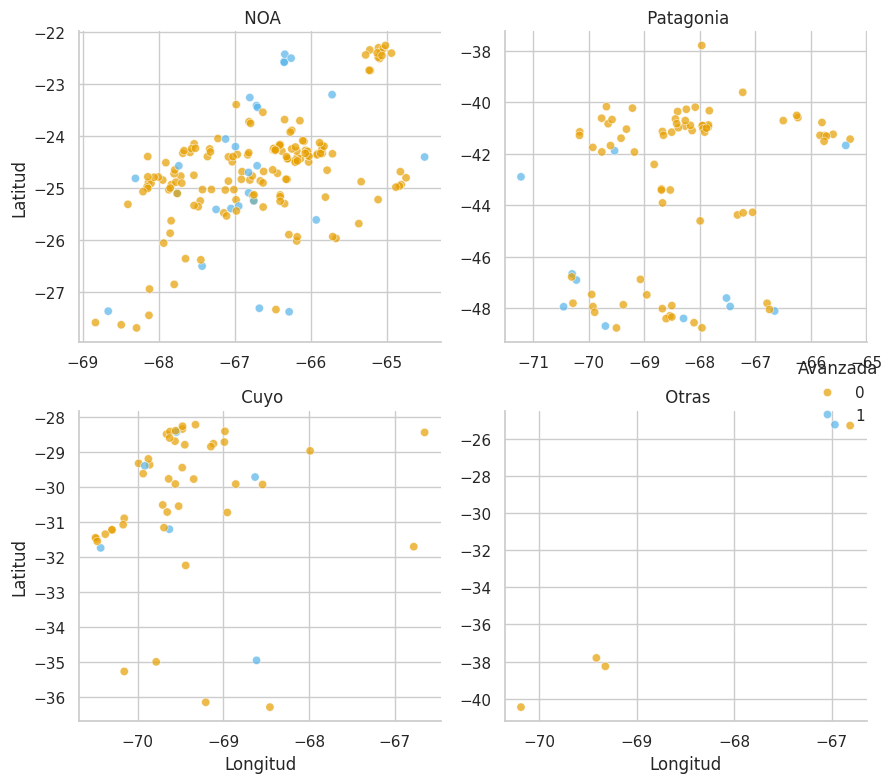

In [223]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
g = sns.FacetGrid(
    df_cleaned,
    col="REGION",
    col_wrap=2,
    height=4,
    sharex=False,
    sharey=False
)
g.map_dataframe(
    sns.scatterplot,
    x="LONGITUD",
    y="LATITUD",
    hue="ETAPA_AVANZADA",
    palette=['#E69F00','#56B4E9'],
    alpha=0.7
)
g.add_legend(title='Avanzada')
g.set_axis_labels("Longitud","Latitud")
for ax in g.axes.flatten():
    ax.set_title(ax.get_title().split('=')[-1])
plt.tight_layout()
plt.show()


In [224]:
import plotly.express as px

# Visualize geographic distribution by REGION using Plotly Express Mapbox
# We'll use scatter_mapbox for a better base map and color points by the 'REGION' column
fig = px.scatter_mapbox(df_cleaned,
                        lat="LATITUD",
                        lon="LONGITUD",
                        color="REGION",  # Color points by the defined Region
                        hover_name="NOMBRE", # Show project name on hover
                        hover_data=["PROVINCIA", "MINERAL PRINCIPAL", "ESTADO", "ETAPA_AVANZADA"], # Add more relevant info on hover
                        zoom=3, # Adjust zoom level to focus on Argentina
                        height=600,
                        title="Ubicación Geográfica de Proyectos Mineros por Región")
# Update layout to set mapbox style and add title
fig.update_layout(mapbox_style="open-street-map", # You can try other styles like "carto-positron", "stamen-terrain", etc.
                  margin={"r":0,"t":40,"l":0,"b":0}, # Adjust margins
                  title_x=0.5 # Center title
                 )

#11. Conclusiones de la Primera Entrega

1. Concentración geográfica  
   - El 57 % de los proyectos se ubica en la región NOA (Salta, Jujuy, Catamarca), seguido por Cuyo (San Juan, Mendoza, La Rioja) con 15 % y Patagonia (Santa Cruz, Chubut, Río Negro) con 26 %.  
   - Este patrón confirma la persistente relevancia de los polos mineros tradicionales y sugiere enfoques específicos de infraestructura y logística.

2. Distribución de minerales  
   - Los tres minerales más frecuentes son Cobre (23 %), Litio (19 %) y Oro (15 %), que juntos abarcan más de la mitad del total.  
   - Plata y Uranio ocupan posiciones intermedias, mientras que Antimonio, Molibdeno, Níquel, Zinc, Wolframio y Manganeso aparecen con baja representación (<3 % cada uno).

3. Estado de avance de la cartera  
   - Más del 80 % de los proyectos se encuentra en fases tempranas (Prospección, Exploración inicial/avanzada).  
   - Solo un 13 % ha alcanzado Factibilidad o Construcción, y un 5 % está en Producción o Reingeniería.  
   - Cesio, Litio y Oro muestran las etapas promedio más avanzadas (valores ordinales 3.0, 2.6 y 2.9 sobre 0–6).

4. Asociación mineral–estado (χ²)  
   - El test de independencia χ² arroja p-value < 0.05, confirmando que la distribución de los estados de avance **no** es independiente del tipo de mineral.  
   - Esto valida estadísticamente la hipótesis de que ciertos minerales tienden a proyectos más maduros.

5. Diferencias en etapa ordinal (ANOVA + Tukey)  
   - ANOVA unidireccional en `ESTADO_ORD` muestra F = 3.04, p = 0.0003: existen diferencias significativas en la etapa promedio entre minerales.  
   - Post-hoc Tukey HSD identifica pares con `reject=True`, por ejemplo:  
     - Litio vs. Cobre (Litio más avanzado)  
     - Litio vs. Plomo  
     - Oro vs. Cobre  
     - Oro vs. Plomo  

6. Limitaciones metodológicas  
   - La codificación ordinal de minerales (`LabelEncoder`) no refleja un orden real (ρ de Spearman ≈ 0.09), por lo que no debe usarse como predictor continuo.  
   - Persisten valores faltantes en las variables de control (1°), que podrían sesgar análisis posteriores si no se imputan o descartan con criterio.